In [1]:
import pandas as pd
import folium
from folium.plugins import HeatMap

In [2]:
#Extracion de los datos
if "zmqshell" in str(get_ipython()):
    print("Running on MIRP")
    root = "/home/mirp_ai/Documents/Daniel_Nieto/PhD/AutoEncoders_Ecoacoustics"
    root_path = "/media/mirp_ai/Seagate Desktop Drive/Datos Rey Zamuro/Ultrasonido"
else:
    import pathlib
    temp = pathlib.PosixPath
    pathlib.PosixPath = pathlib.WindowsPath
    print("Running local")

root_audios_Zamuro = f"{root}/Zamuro/Complementary_Files/zamuro_audios.csv"
root_recorders_Zamuro = f"{root}/Zamuro/Complementary_Files/zamuro_recorders.csv"
root_clusters = f"{root}/Zamuro/temporal_zamuro/zamuro_clustering_results/"

audios = pd.read_csv(root_audios_Zamuro, index_col=0)
recorders = pd.read_csv(root_recorders_Zamuro, index_col=0)

Running on MIRP


In [17]:
audios

,index,field_number_PR,longitud_IG,latitude_IG,day_init_TI,day_end_TI,samp_rate_RE,habitat,pasture,savanna,forest,cover,Filename,name_FI,rain_FI
0,0,RZUA01,-73.411659,3.555860,3,14,192000,bosque,1.000000,0.000000,0.00000,pasture,20220906_063000.WAV,20220906_063000,NO
1,1,RZUA01,-73.411659,3.555860,3,14,192000,bosque,1.000000,0.000000,0.00000,pasture,20220909_023000.WAV,20220909_023000,YES
2,2,RZUA01,-73.411659,3.555860,3,14,192000,bosque,1.000000,0.000000,0.00000,pasture,20220903_104500.WAV,20220903_104500,YES
3,3,RZUA01,-73.411659,3.555860,3,14,192000,bosque,1.000000,0.000000,0.00000,pasture,20220903_110000.WAV,20220903_110000,NO
4,4,RZUA01,-73.411659,3.555860,3,14,192000,bosque,1.000000,0.000000,0.00000,pasture,20220903_111500.WAV,20220903_111500,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78311,767,RZUD01M,-73.400768,3.555762,3,11,192000,bosque,0.786941,0.000008,0.21305,pasture,20220911_074500.WAV,20220911_074500,NO
78312,768,RZUD01M,-73.400768,3.555762,3,11,192000,bosque,0.786941,0.000008,0.21305,pasture,20220911_080000.WAV,20220911_080000,NO
78313,769,RZUD01M,-73.400768,3.555762,3,11,192000,bosque,0.786941,0.000008,0.21305,pasture,20220911_081500.WAV,20220911_081500,NO
78314,770,RZUD01M,-73.400768,3.555762,3,11,192000,bosque,0.786941,0.000008,0.21305,pasture,20220911_083000.WAV,20220911_083000,NO


In [9]:
#Extraer la columnas importantes
import numpy as np
df = recorders.loc[:, ["latitude_IG", "longitud_IG"]]
df["number"] = np.random.randint(0,500,94)

In [10]:
df

,latitude_IG,longitud_IG,number
0,3.555860,-73.411659,68
1,3.552269,-73.411659,473
2,3.548784,-73.411520,487
3,3.544981,-73.411514,10
4,3.541357,-73.411571,132
...,...,...,...
89,3.523509,-73.386542,91
90,3.519590,-73.386250,16
91,3.516031,-73.386458,188
92,3.512511,-73.386398,412


In [12]:
#convertir los datos <objt> a <float>
df = df.dropna()
# def conv_loc(row):
#     return float(row.replace(",", "."))
df['latitude_IG'] = df['latitude_IG'].apply(conv_loc)
df['longitud_IG'] = df['longitud_IG'].apply(conv_loc)

AttributeError: 'float' object has no attribute 'replace'

In [16]:
#diagramacion de los datos
%matplotlib qt
mapa = folium.Map(location=[3.523199, -73.411489], zoom_start=13.5)

puntos = df[['latitude_IG', 'longitud_IG', 'number']].values.tolist()
valores = df["number"].tolist()
HeatMap(puntos, radius=18, ).add_to(mapa)
mapa

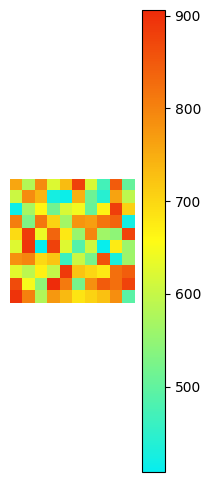

In [ ]:
#barra de calor
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker

data = np.random.randint(408,908, (10, 10))

fig, ax = plt.subplots(figsize=(2, 6))  # Ajusta el tamaño según tus preferencias

colors = ['#06EEEF', '#FFFB15', '#EE2B0A']
cmap = mcolors.LinearSegmentedColormap.from_list('custom', colors, N=256)

cax = ax.matshow(data, cmap=cmap)

ax.axis('off')

cbar = fig.colorbar(cax)

cbar.formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x):,}')
cbar.update_ticks()

plt.show()